<b>Video Game Analyzation and Examination<b><br>
    
By Zeeshan Fiaz & Vikram Jasti

Beginning - Unlike many other industries, the videogame sector grows by over twenty percent each year, beating out T.V. shows and movies. This uphill incline of interest forces VideoGame companies to release more games on a frequent basis. The frequent release of games tend to deteriorate the quality of the games, making them laggy and not as good enough. Because of this, companies try to make sequels to games that were already successful so they can utilize the same intellectual property (IP). That's where the question we have in place right now comes into play. In this file, we will talk about the VideoGame world with the utilization of ratings and reviews from customers to aid our claims.

<b>Pipeline for Data Science phases<b>

1. Data collection/curation + parsing: We need ratings and review scores from various companies and games to examine the data
2. Data management/representation: Utilize visual data and graphs to check for patterns
3. Exploratory data analysis: Take away any keypoints of data
4. Hypothesis testing: Test the Hypotheses and make final claims
5. Communication of insights attained: Conclude everything to talk about this whole process

<b>The Inquiry we are trying to answer:<b> 

Have Video Games gotten worse over time in the last 8 years? <br>
    
To dive deep into this question, compiling some data and analyzing the movements in the data can help us gain more knowledge on this. This will gear us toward the hypothesis, where we can test it and conclude on conclusions. To start off, the data we will be using are ratings on the games and customer scores for the review they put. Our measurement of quality will be the scores of review and the ratings for the game is to see how popular and well-known it became. In the beginning stage now, we will utilize wikipedia pages since they have the games made by each of the three companies for each decade. 

In [2]:
import numpy as np
import re
import pandas as pd
import matplotlib as mp

<b>First Part of Collecting Data<b>

In [3]:
#PART I - Data Collection

# Scraping data of game companies game releases off of Wikipedia
# links are where we found the data for this project


# List of EA Sports games spanning from 2000 - present day taken from Wikipedia
ea = ['https://en.wikipedia.org/wiki/List_of_Electronic_Arts_games:_2000%E2%80%932009',
      'https://en.wikipedia.org/wiki/List_of_Electronic_Arts_games:_2010%E2%80%932019',
      'https://en.wikipedia.org/wiki/List_of_Electronic_Arts_games:_2020%E2%80%93present'
     ]


# List of Activisions games spanning from 2000 - present day taken from Wikipedia
activision = ['https://en.wikipedia.org/wiki/List_of_Activision_games:_2000%E2%80%932009',
              'https://en.wikipedia.org/wiki/List_of_Activision_games:_2010%E2%80%932019',
              'https://en.wikipedia.org/wiki/List_of_Activision_games:_2020%E2%80%93present'
             ]




#Company Dataframes for different years in a list
#Creating a Dataframe for each decade games were released for ex. (2000-2009), (2020 - present)
activision_release_date = [pd.read_html(activision[0])[0], pd.read_html(activision[1])[0], pd.read_html(activision[2])[0]]
ea_release_date = [pd.read_html(ea[0])[1], pd.read_html(ea[1])[1], pd.read_html(ea[2])[1]]


#list of games released from 2000-2009 released by EA
ea_release_date[0]

,Title,Release date,Platforms,Developer(s),Ref(s)
0,Jane's Combat Simulations: F/A-18 Simulator,"January 11, 2000",Microsoft Windows,Electronic Arts,[1][2]
1,Tiger Woods PGA Tour 2000,January 2000,Game Boy Color,Xantera,[3]
2,Tiger Woods PGA Tour 2000,"February 29, 2000",Microsoft Windows,Rainbow Studios,[4]
3,Mobil 1 British Rally Championship,"January 31, 2000",Microsoft Windows,Magnetic Fields / Creative Asylum Limited,[5]
4,NASCAR Rumble,"January 31, 2000",PlayStation,EA Redwood Shores,[6]
...,...,...,...,...,...
1284,The Saboteur,"December 3, 2009",PlayStation 3,Pandemic Studios,[762]
1285,The Saboteur,"December 3, 2009",Microsoft Windows,Pandemic Studios,[762]
1286,The Saboteur,"December 3, 2009",Xbox 360,Pandemic Studios,[762]
1287,Flips,"December 4, 2009",Nintendo DS,Electronic Arts,[763][764]


Looking at the above table, the column headers are names of the games with the date and platform they came out on. We have the Ref column which does not provide us a lot of data because it just provided links to some wikipedia pages. We must take out this unnecessary column from our data and get the correct time period of games we want which is the games from the last 17 years.

In [4]:
# copying the contents from activision_release_date df into the new activision_df we're making 
# will be the df where we clean our data
activision_df = pd.concat(activision_release_date)

# copying the contents from ea_release_date df into the new ea_df we're making
# will be the df where we clean our data
ea_df = pd.concat(ea_release_date)


# resetting the index of our data frame, so all entries from both df can have the same index
activision_df = activision_df.reset_index(drop=True)
ea_df = ea_df.reset_index(drop=True)


# since we are looking at games that have been released already, we are going to remove games that aren't released yet
# so games that have the value TBA in there release date column will be removed from our df
activision_df = activision_df[activision_df["Release date"] != 'TBA']
ea_df = ea_df[ea_df["Release date"] != 'TBA']


# we are now removing the month and date of each release date in our Release Date column, which will make our data easier to test


# loop through our activision_df and take the last four characters in our string which are the year of the games release date and convert it into an int
for i in range(len(activision_df)):
    activision_df["Release date"][i] = int(activision_df["Release date"][i][-4:])
    
    
# loop through our ea_df and take the last four characters in our string which are the year of the games release date and convert it into an int
for i in range(len(ea_df)):
    ea_df["Release date"][i] = int(ea_df["Release date"][i][-4:])



#filter our df by looking at games between 2007-2022
#function that will remove games that don't fit our standard of being release after 2007 and games that are not released yet
#parameters taken in is a df, column name which will be release date, start year which is 2007, and end_year which is 2022
def remove_years(df, start_year, end_year, col_name):
    
    # checking if the game is release before 2007
    before_release = df[df[col_name] >= start_year]
    
    #check if game is released after 2022
    after_release = before_release[before_release[col_name] <= end_year]
    
    return after_release


#using our remove_year function to clean our data and make sure games released before 2007 and games after 2022 are deleted from df
#reset index of our df to make df cleaner
ea_df = remove_years(ea_df, 2007, 2022, "Release date").sort_values(by = "Release date").reset_index(drop = True)
activision_df = remove_years(activision_df, 2007, 2022, "Release date").sort_values(by = "Release date").reset_index(drop = True)


#Removing Ref/Ref(s) column b/c it has no relevance to our data
ea_df = ea_df.drop(columns="Ref(s)")
activision_df = activision_df.drop(columns="Ref.")

#show our clean activison_df now
activision_df

,Title,Platform(s),Release date,Developer(s)
0,Call of Duty: Roads to Victory,PlayStation Portable,2007,Amaze Entertainment
1,Guitar Hero III: Legends of Rock,Xbox 360,2007,Neversoft
2,Guitar Hero III: Legends of Rock,Wii,2007,Vicarious Visions
3,Guitar Hero III: Legends of Rock,PlayStation 3,2007,Neversoft
4,Guitar Hero III: Legends of Rock,PlayStation 2,2007,Budcat Creations
...,...,...,...,...
757,Call of Duty: Modern Warfare II,Xbox One,2022,Infinity Ward
758,Call of Duty: Modern Warfare II,Microsoft Windows,2022,Infinity Ward
759,Call of Duty: Modern Warfare II,PlayStation 4,2022,Infinity Ward
760,Call of Duty: Modern Warfare II,PlayStation 5,2022,Infinity Ward


After the steps of code above, our data is organized with the most necessary columns there only. We now need to obtain the metacritic scores and get rid of multiple occurrences of games since they had various platforms.

In [5]:
# creating a function to merge all game entries on different platforms into one
# an example of this would be Modern Warfare II shown above and how there are multiple entries. We only need one so we will merge all game entries into one
# will have parameters games which will be the games column, the df we are looking at which is either activision or ea and the platform which is just Playstation 4, Nintendo Switch , etc.
def merge(df, games, platform_string): #The platform_string is because each dataframe's platforms column name is slightly different
    #create an empty array ans name it rows
    game_rows = []
    
    #loop through games parameter we passed in to function
    for game in games:
        
        # create new lists that will add the game and platform in there own respective list
        games_list = df[df['Title'] == game]
        games_platforms = list(games_list[platform_string])
        
        #loop through games_platforms list
        for i, platform in enumerate(games_platforms):
            
            #if the gaming platform is anything in our conditional we will set it to L to drop later
            if platform == 'Amazon Luna' or platform == 'Mobile phones' or platform == 'iOS' or platform == 'Android' or platform == 'N-Gage':
                games_platforms[i] = "-" 
                
            #change name Playstation portable to psp
            elif platform == 'PlayStation Portable':
                games_platforms[i] = 'psp'
           
           #change name Nintendo Switch to switch
            elif platform == 'Nintendo Switch':
                games_platforms[i] = 'switch'
        
            #change name Nintendo 3DS to 3ds
            elif platform == 'Nintendo 3DS':
                games_platforms[i] = '3ds'

            #change name Nintendo DS to ds  
            elif platform == 'Nintendo DS':
                games_platforms[i] = 'ds'
                
            #change name Xbox Series X/S to xbox-series-x since there the same console
            elif platform == 'Xbox Series X/S':
                games_platforms[i] = 'xbox-series-x'
                
            elif platform == 'Microsoft Windows' or platform == 'Windows':
                games_platforms[i] = 'pc'
                
        #for any element in our list that is a * we remove from our list
        if "-" in games_platforms:
            games_platforms.remove('-')
           
        #create a new variable release_year that will take the Release Date of our games_list
        release_year = games_list.iloc[0]['Release date']
        
        #create a new variable called platforms that will join every platform in our platforms_list associated with each game
        platforms = ','.join(games_platforms).lower().replace(' ', '-')
        
        #create a new variable called gaem_developer that will take the Develepors column in our list
        game_developer = games_list.iloc[0]['Developer(s)']
        
        #create a new list that will take in all 4 variable we have created above
        new_list = [game, platforms, release_year, game_developer]
        
        #append each list into our new list
        game_rows.append(new_list)
        
    #return thr data frame with renamed columns and with game_rows being our new df being returned
    return pd.DataFrame(data=game_rows, columns=['Title', 'Game_Platform', 'Release_Year', 'Developer'])

#games that don't have duplicates for each developer
activision_non_dup = activision_df['Title'].drop_duplicates()
ea_non_dup = ea_df['Title'].drop_duplicates()


#calling merge function to get a new and improved activision_df
activision_df2 = merge(activision_df, activision_non_dup, 'Platform(s)')
activision_df2 = activision_df2[activision_df2['Game_Platform'] != ''] 

#calling merge function to get a new and improved ea_df
ea_df2 = merge(ea_df, ea_non_dup, 'Platforms')
ea_df2 = ea_df2[ea_df2['Game_Platform'] != '-']

activision_df2

,Title,Game_Platform,Release_Year,Developer
0,Call of Duty: Roads to Victory,psp,2007,Amaze Entertainment
1,Guitar Hero III: Legends of Rock,"xbox-360,wii,playstation-3,playstation-2,pc",2007,Neversoft
2,Dancing With the Stars,"wii,playstation-2",2007,Zoë Mode
3,Bee Movie Game,"xbox-360,wii,playstation-2,ds,pc",2007,Beenox
4,Tony Hawk's Proving Ground,"xbox-360,wii,playstation-3,playstation-2,ds",2007,Neversoft
...,...,...,...,...
242,Tony Hawk's Pro Skater 1 + 2,"xbox-one,pc,playstation-4,xbox-series-x,switch...",2020,Vicarious Visions
243,Call of Duty: Modern Warfare 2 - Campaign Rema...,"xbox-one,pc,playstation-4",2020,Beenox
244,Call of Duty: Warzone,"xbox-one,playstation-4,pc",2020,Infinity Ward / Raven Software
245,Call of Duty: Vanguard,"xbox-series-x,xbox-one,playstation-5,playstati...",2021,Sledgehammer Games


In the above code, we were able to take out the white space and put a dash and put everything in lower case since this helps us organize the data and get to the website of the metacritics part because when looking at the metacritic url, they use dashes instead of spaces and only use lowercase lettering hence why we did that to our df above. Also changed the column name to more standard convention we have used throughout the class.

Now, we have to take the name of the VideoGame and turn it into a URL version because we have to take into account special characters. As we know in URLs there are no spaces or uppercase lettering, so we have to take that into account.

i.e: Madden 25 Ultimate Team - madden-25-ultimate-team

In [6]:
#function that converts the title of the games name to its metacritic name which is just the games name in all lowercase and instead of spaces there are dashes
#parameter game is the name of the game that is being passed in
def convert_game_name(game):
    
    #create a new variable meta_game that will split after the [ at the first index of string
    meta_game = ''.join(game.strip().split('[')[:1])
    
    # create a new variable called split that will split all white space and additional characters from the game title
    split = re.split("\s|: |-|, |&| – | - ", meta_game)
    
    #remove any other remaining white space from the string
    split = [elem for elem in split if elem != ''] 
    
    #condtitional that checks if there is a - in our split variable and if so we remove it from split string
    if '–' in split:
        split.remove('–')
        
    #create a new variable called metacritic name which will be the url metacritic name we will need 
    metacritic_name = '-'.join(split).lower().replace("'", "")
    
    #conditional that checks if there is another - in name because in some urls cases there are multiple -
    if '–' in metacritic_name: 
        
        #replace them with single quotes instead of double
        metacritic_name = metacritic_name.replace('–', "-")
        
    #conditional that checks if there is a . in metacritic name and if so we remove it
    if '.' in metacritic_name:
        metacritic_name = metacritic_name.replace('.','')    
    
    #return the final metacritic name that matches to what we said in function header
    return metacritic_name


#add a new column Metacritic Name and add convert the title of game to its activision game using the convert_name_game function
activision_df2["Metacritic_Name"] = [convert_game_name(name) for name in list(activision_df2["Title"])]

#add a new column Metacritic Name and add convert the title of game to its metacritic game using the convert_name_game function
ea_df2["Metacritic_Name"] = [convert_game_name(name) for name in list(ea_df2["Title"])]

#displaying updated activision df
activision_df2

,Title,Game_Platform,Release_Year,Developer,Metacritic_Name
0,Call of Duty: Roads to Victory,psp,2007,Amaze Entertainment,call-of-duty-roads-to-victory
1,Guitar Hero III: Legends of Rock,"xbox-360,wii,playstation-3,playstation-2,pc",2007,Neversoft,guitar-hero-iii-legends-of-rock
2,Dancing With the Stars,"wii,playstation-2",2007,Zoë Mode,dancing-with-the-stars
3,Bee Movie Game,"xbox-360,wii,playstation-2,ds,pc",2007,Beenox,bee-movie-game
4,Tony Hawk's Proving Ground,"xbox-360,wii,playstation-3,playstation-2,ds",2007,Neversoft,tony-hawks-proving-ground
...,...,...,...,...,...
242,Tony Hawk's Pro Skater 1 + 2,"xbox-one,pc,playstation-4,xbox-series-x,switch...",2020,Vicarious Visions,tony-hawks-pro-skater-1-+-2
243,Call of Duty: Modern Warfare 2 - Campaign Rema...,"xbox-one,pc,playstation-4",2020,Beenox,call-of-duty-modern-warfare-2-campaign-remastered
244,Call of Duty: Warzone,"xbox-one,playstation-4,pc",2020,Infinity Ward / Raven Software,call-of-duty-warzone
245,Call of Duty: Vanguard,"xbox-series-x,xbox-one,playstation-5,playstati...",2021,Sledgehammer Games,call-of-duty-vanguard


What we did in the code above, we made our df easier to read when we will scrape the metacritic website. If you look at the metacritic website we see that there is no such thing as a Playstion Portable or a Nintendo Switch. In Metacritic they are known as switch and psp. So above we just formatted our df columns and created a new metacritic column that will be a url representation of what the game is called.

After this, we are able to get to the metacritic website where we will use the library request to obtain the html and scrape the data. The library we will use is beautifulsoup and we have to import them.

In [7]:
import requests as r
from bs4 import BeautifulSoup as BS

If anyone wants to look at beautiful soups documentation just click the link.

So we get a Request timed out here and this happens when the request has no information in it as to where it came from. Usually, security measures server can block these requests to not get overwhelmed by bots. With this information in hand, it is our turn to create headers that we can send in the request. If we go to a browser and put a url in there, we can inspect it after that. Below are the steps shown for this.

Now we want to find the webpage in the column "Name". For this instance we are looking at Injustice 2. Once you can see the name, you are able to see info on it with the panel shown next to it.

For alot of websites, they are heavily secured. When data scraping, many data scientist run into problem of requests timing out. So we ran some steps to make ourselves seem less suspicious. We create a header so the website knows we are not a bot and below is a header we have created by inspecting the metacritic website. Inspect can help us mitigate timeout request errors and can help us scrape data from big websites such as metacritic.

In [8]:
#Copy these headers off of the inspect
headers = {
    "accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
    "accept-encoding": "gzip, deflate, br",
    "accept-language": "en-US,en;q=0.9",
    "cache-control": "max-age=0",
    "pragma": "no-cache",
    "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36"
}

After putting in the headers to the request to make it go through the server, the request can be gone through and we will get a response back. We can get the html from the webpage where we get the ratings and review scores.

In [9]:
#function that converts the game title to its url title so we can scrape the data
#return result will look like: https://www.metacritic.com/game/[game platform]/[game name]
def convert_url(name, platform):
    
    #every game will start out with the meta critic url 
    base_url = "https://www.metacritic.com/game/"

    #create a regex for the url name
    url_name = f"{base_url}{platform}/{name}"

    #return the final url_name that will look like what we said previously
    return url_name

#function that will scrape data off of our df we will pass in via parameter
#will return a df that will look like our df before and metacritic values we will scrape off web
def scrape(df):
    
    #creating an array that will store the values we are looking for in metacritic which is the score and ratings from metacritic
    metacritic_stuff = []

    #loop through all the columns from the previous df we made earlier
    for i, (Title, platform, Release_Year, Developer, Metacritic_Name) in df.iterrows():

        #split at every comma in platform because some games release on many platforms
        for platform in platform.split(","):

            #get the url from the convert_url function we created before
            url = convert_url(Metacritic_Name, platform)

            #create a try catch block for games we cannot access when scraping through metacritic
            try:
                #get all the contents we need to create a row for our final df that will contain metacritic data we scraped
                response = r.get(url,headers=headers)
                html = response.content
                soup = BS(html,'html.parser')
                user_score = soup.find(class_="large").text
                rating_amount = soup.find('a', href=f"{url[26:]}/user-reviews", class_=None).text.split(" ")[0]

                #add the 5 columns for each game into our metacritic_stuff array
                metacritic_stuff.append([Title, platform, user_score, rating_amount, Release_Year])

            
            #if we cannot get the game we will just say the game we are requesting to scrape timed out
            except:
                print(f"request for {url} timed out")
    #return a df we will create from the metacritic_stuff array
    return pd.DataFrame(data=metacritic_stuff, columns=['Title', 'Platform', 'Score', 'Ratings', 'Year'])

In [10]:
#create a new df that will display all of the metacritic data aswell as the contents from our previous df
activision_df3 = scrape(activision_df2)

#display the df
activision_df3

#we see that there are alot of timeouts because of various reasons like the game does not exist on a console or it is not found in metacritic database, so we will not deal with it

request for https://www.metacritic.com/game/xbox-360/bee-movie-game timed out
request for https://www.metacritic.com/game/wii/bee-movie-game timed out
request for https://www.metacritic.com/game/ds/bee-movie-game timed out
request for https://www.metacritic.com/game/pc/bee-movie-game timed out
request for https://www.metacritic.com/game/game-boy-advance/barbie-as-the-island-princess timed out
request for https://www.metacritic.com/game/ds/shrek-ogres-and-dronkeys timed out
request for https://www.metacritic.com/game/xbox-live-arcade/shrek-n-roll timed out
request for https://www.metacritic.com/game/ds/mahjong-quest-expeditions timed out
request for https://www.metacritic.com/game/psp/shrek-the-third timed out
request for https://www.metacritic.com/game/pc/shrek-the-third timed out
request for https://www.metacritic.com/game/ds/shrek-the-third timed out
request for https://www.metacritic.com/game/xbox-360/shrek-the-third timed out
request for https://www.metacritic.com/game/ds/shrek-sma

,Title,Platform,Score,Ratings,Year
0,Call of Duty: Roads to Victory,psp,7.1,58,2007
1,Guitar Hero III: Legends of Rock,xbox-360,8.0,203,2007
2,Guitar Hero III: Legends of Rock,wii,7.7,110,2007
3,Guitar Hero III: Legends of Rock,playstation-3,7.8,65,2007
4,Guitar Hero III: Legends of Rock,playstation-2,8.4,86,2007
...,...,...,...,...,...
557,Call of Duty: Modern Warfare II,xbox-one,5.6,33,2022
558,Call of Duty: Modern Warfare II,pc,5.0,282,2022
559,Call of Duty: Modern Warfare II,playstation-4,5.4,45,2022
560,Call of Duty: Modern Warfare II,playstation-5,5.0,509,2022


The code above may look confusing but it's really not. In our data we scraped from wikipedia there are just some games that don't exist in MetaCritic but it does in Wikipedia. An example is the game mahjong-quest-expeditions for the ds. It exists on the list of games that Activision has created, but not in metacritic. So we get timeout errors, but they will not be in our df. Therefore we have lost some games in the process of scraping off of Metacritic. Differences in names, platforms not being list in metacritic but is listed in wikipedia, and alot of other things can cause us to lose alot of games to be honest. Also we have to take into account mobile games and we did not really take mobile cames into account in our experiment. So again, to mitifate this problem we did not use this data in our df. 

In [11]:
ea_df3 = scrape(ea_df2)
ea_df3

request for https://www.metacritic.com/game/java-me/fifa-08 timed out
request for https://www.metacritic.com/game/n-gage-2/fifa-08 timed out
request for https://www.metacritic.com/game/ds/fifa-08 timed out
request for https://www.metacritic.com/game/playstation-2/fifa-08 timed out
request for https://www.metacritic.com/game/playstation-3/fifa-08 timed out
request for https://www.metacritic.com/game/psp/fifa-08 timed out
request for https://www.metacritic.com/game/wii/fifa-08 timed out
request for https://www.metacritic.com/game/xbox-360/fifa-08 timed out
request for https://www.metacritic.com/game/zeebo/fifa-08 timed out
request for https://www.metacritic.com/game/pc/fifa-08 timed out
request for https://www.metacritic.com/game/macintosh/tiger-woods-pga-tour-08 timed out
request for https://www.metacritic.com/game/windows-mobile/need-for-speed-prostreet timed out
request for https://www.metacritic.com/game/ds/boulder-dash-rocks! timed out
request for https://www.metacritic.com/game/psp

,Title,Platform,Score,Ratings,Year
0,NBA Live 08,wii,7.1,21,2007
1,NBA Live 08,playstation-2,6.7,10,2007
2,NBA Live 08,playstation-3,6.9,11,2007
3,NBA Live 08,psp,7.0,7,2007
4,NBA Live 08,xbox-360,5.3,19,2007
...,...,...,...,...,...
892,F1 22,playstation-4,3.4,11,2022
893,F1 22,playstation-5,3.3,79,2022
894,F1 22,xbox-one,3.7,9,2022
895,F1 22,xbox-series-x,4.0,32,2022


The above code ea code is the same as activision. If you want to read it again.

In [12]:
#create a csv for both games because it takes a long time to scrape the data and this is more efficient
activision_df3.to_csv('./activision_df3.csv', index=False)
ea_df3.to_csv('./ea_df3.csv', index=False)

So if you run the above code it takes awhile for the output to show up. So, we decided to create a csv, so we don't have to process our data multiple times and have to wait 10-15 minutes every time we use that data. So to make our lives easier we did it this way.

In [13]:
#create a new df that will read in the csv we made for both game companies previously
#keep rows that have scores that do onot equal tbd for both df
ea_df3 = pd.read_csv('./ea_df3.csv')
ea_df3 = ea_df3[ea_df3['Score'] != 'tbd']

activision_df3 = pd.read_csv('./activision_df3.csv')
activision_df3 = activision_df3[activision_df3['Score'] != 'tbd']

#set the score column in our df to a float so we can make calculations later
ea_df3['Score'] = ea_df3['Score'].astype(float)
activision_df3['Score'] = activision_df3['Score'].astype(float)

#create a new df called combined that just combines the ea and activision df together
combined = pd.concat([ea_df3, activision_df3])

#display the combined df
combined

,Title,Platform,Score,Ratings,Year
0,NBA Live 08,wii,7.1,21,2007
1,NBA Live 08,playstation-2,6.7,10,2007
2,NBA Live 08,playstation-3,6.9,11,2007
3,NBA Live 08,psp,7.0,7,2007
4,NBA Live 08,xbox-360,5.3,19,2007
...,...,...,...,...,...
557,Call of Duty: Modern Warfare II,xbox-one,5.6,33,2022
558,Call of Duty: Modern Warfare II,pc,5.0,282,2022
559,Call of Duty: Modern Warfare II,playstation-4,5.4,45,2022
560,Call of Duty: Modern Warfare II,playstation-5,5.0,509,2022


Above we turned our Metacritic score column into a float because it will be easier to calculate average scores and sum up the scores as we will do below. We also combined our ea dataframe and our activision dataframe to create one big dataframe, which stores all the games we collected throughout this experiment.

Below we take the average score for each game. So if a game is realeased on 5 gaming platforms. We take all of the ratings and average it out to get its average metacritic score. Also combine the platforms together if the game is released on multiple platforms.

In [14]:
#function that gets the average score and ratings
#takes in a df that will be ea_df3 or activision_df3 we made prior
def average(df):

    #create an array called rows that we will store all of our data in
    rows = []

    #drop duplicates of all the game titles in our df
    games_title = list(df['Title'].drop_duplicates())

    #loop through our games_title list
    for i in games_title:

        #making a new df that takes in the title of the df we passed in
        sub_df = df[df['Title'] == i]

        #get the mean score of all the games that have the same platform and store it and have 2 decimal places
        mean_score = round(np.mean(list(sub_df['Score'])),2)

        #get the ratings of all the games that have been released on the same platform
        ratings = sum([int(elem) for elem in list(sub_df['Ratings'])])

        #if the game has the same platform we join them all together and add the ratings and year since they will be the same
        rows.append([i, ','.join(list(sub_df['Platform'])),mean_score, sub_df.iloc[0]['Ratings'], sub_df.iloc[0]['Year']])

    #return a df with the columns Title, Platform, Score, Ratings, Year
    return pd.DataFrame(data=rows, columns=['Title', 'Platform', 'Score', 'Ratings', 'Year'])

#create a new df that hget the average of score and platform by calling average function we made
ea_avg = average(ea_df3)
activision_avg = average(activision_df3)

#create a new df that takes in the two avg df we just created
combined_avg = pd.concat([ea_avg, activision_avg])

#display the combined avg df
combined_avg

,Title,Platform,Score,Ratings,Year
0,NBA Live 08,"wii,playstation-2,playstation-3,psp,xbox-360,pc",6.10,21,2007
1,MySims,"ds,wii,pc",7.07,19,2007
2,Skate,"xbox-360,playstation-3",8.30,152,2007
3,Medal of Honor: Airborne,"playstation-3,xbox-360,pc",7.23,57,2007
4,Tiger Woods PGA Tour 08,"ds,playstation-3,wii,pc,xbox-360",6.88,8,2007
...,...,...,...,...,...
147,Tony Hawk's Pro Skater 1 + 2,"xbox-one,pc,playstation-4,xbox-series-x,switch...",7.50,83,2020
148,Call of Duty: Modern Warfare 2 - Campaign Rema...,"xbox-one,pc,playstation-4",7.63,39,2020
149,Call of Duty: Warzone,"xbox-one,playstation-4,pc",3.80,106,2020
150,Call of Duty: Vanguard,"xbox-series-x,xbox-one,playstation-5,playstati...",4.14,253,2021


Above is the final df we will use to visualize our data and run tests along with ea_df3 and activision_df3

As stated earlier we did lose alot of data for reasons again such as being in the Wikipedia but not being in the Metacritic. Or the url name was worded funky on metacritics end. There are many reasons why this could have happened and it happens all the time in data science. Overall, we would classify this data as Missing Not At Random since it's missing to the reasons listed above. To combat this, we did not include these in our data to make our lives easier.

<b>Second Part & Third Part on Data representation and Exploratory data<b>

Our first part consisted of obtaining data, and now we can make visual representations such as graphs to get more insight.

Our code will use an importation of matplot which is a library that helps make certain types of graphs.

In [16]:
#This helps us with the visual representations and graphs 
import matplotlib.pyplot as plt

We will now create graphs for ratings and scores for each of the companies. The time period for these graphs will be in the last 17 years and the middle line in a boxplot represents the median. The outline boxes are the higher and lower quartile and the highest and lowest score are the very end lines.

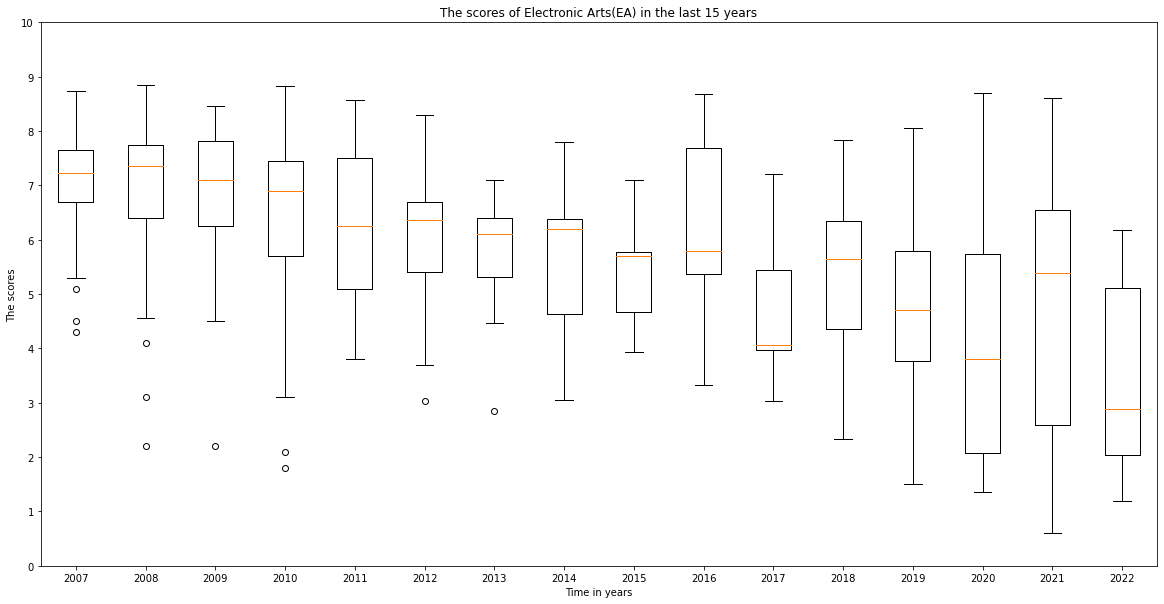

In [32]:
#The graph for the Electronic Arts (EA)
years= list(combined_avg['Year'].drop_duplicates())
time_scores = [list(ea_avg[ea_avg['Year'] == year]['Score']) for year in years]
#Below is where all the characteristics of the graph such as titles and axis, 
#will be displayed
fig, graph_EA = plt.subplots(figsize=(20,10))
graph_EA.set_title("The scores of Electronic Arts(EA) in the last 15 years")
graph_EA.boxplot(time_scores)
graph_EA.set_xlabel("Time in years")
graph_EA.set_yticks([i for i in range(0,11)])
graph_EA.set_xticklabels(years)
graph_EA.set_ylabel("The scores")
#Command to display the graph
plt.show()

The plot for Electronic Arts (EA) starts decreasing in median each year till it starts fluctuating in the recent years. The maximum and minimum scores get bigger towards the end while in the beginning years, the range of these is very small.

/tmp/ipykernel_198/395429198.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  graph_for_activ.set_xticklabels(years)


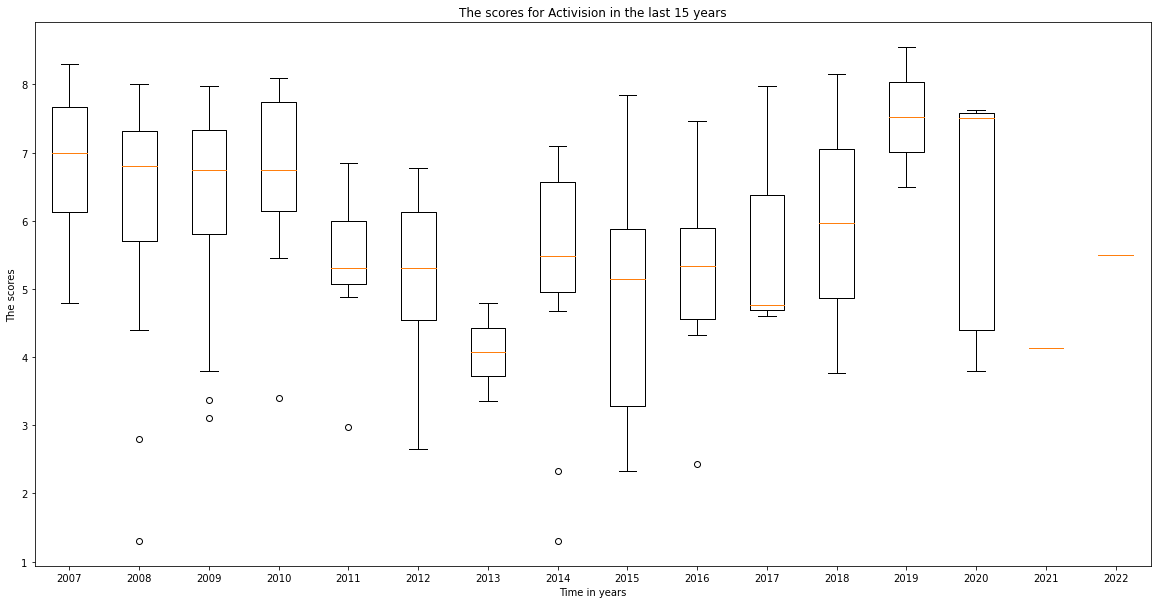

In [29]:
#The visual for Activision
time_scores =[list(activision_avg[activision_avg['Year'] == year]['Score']) for year in years]
#Organizing data for each year based on score
fig, graph_for_activ = plt.subplots(figsize=(20,10))
#Aesthestics for plot 
graph_for_activ.set_yticks([i for i in range(0,11)])
graph_for_activ.set_ylabel("The scores")
graph_for_activ.set_xticklabels(years)
graph_for_activ.boxplot(time_scores)
graph_for_activ.set_title("The scores for Activision in the last 15 years")
graph_for_activ.set_xlabel("Time in years")
plt.show()

The boxplot for Activision is more unique than the others because the median is not balanced between the quartiles and is more towards the lower quartile. There is no steady decrease or increase as the fluctuation is very heavy. The recent years boxplots look very off compared to the beginning years. In general, the plots do not have a big range from the maximums and minimums.

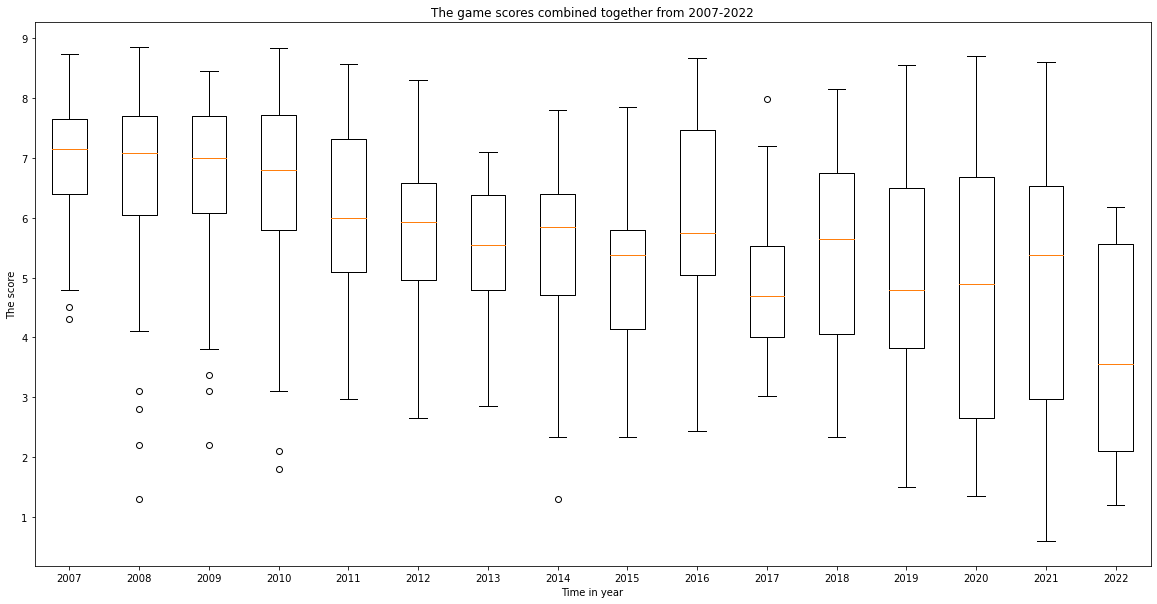

In [30]:
#The graph of both Activision and EA into combined into one
time_scores=[list( combined_avg[combined_avg['Year'] ==year]['Score']) for year in years]
fig, graph_together = plt.subplots(figsize=(20,10))
#Combining both datasets to make it into one
graph_together.set_ylabel("The score")
graph_together.set_yticks([i for i in range(0,11)])
graph_together.set_xlabel("Time in year")
graph_together.boxplot(time_scores)
#Labeling each axes
graph_together.set_title("The game scores combined together from 2007-2022")
graph_together.set_xticklabels(years)
plt.show()

This boxplot contains all of the companies plots and data combined into one for the last seventeen years. This data looks more organized as we can see a slow decline each year with no random jumps or spikes. The only major thing that catches our eye is how long the boxplot is in the recent yeats of 2020 and 2021 with big maximum and minimums.

The slope of best fit line is: -0.23205711885316344


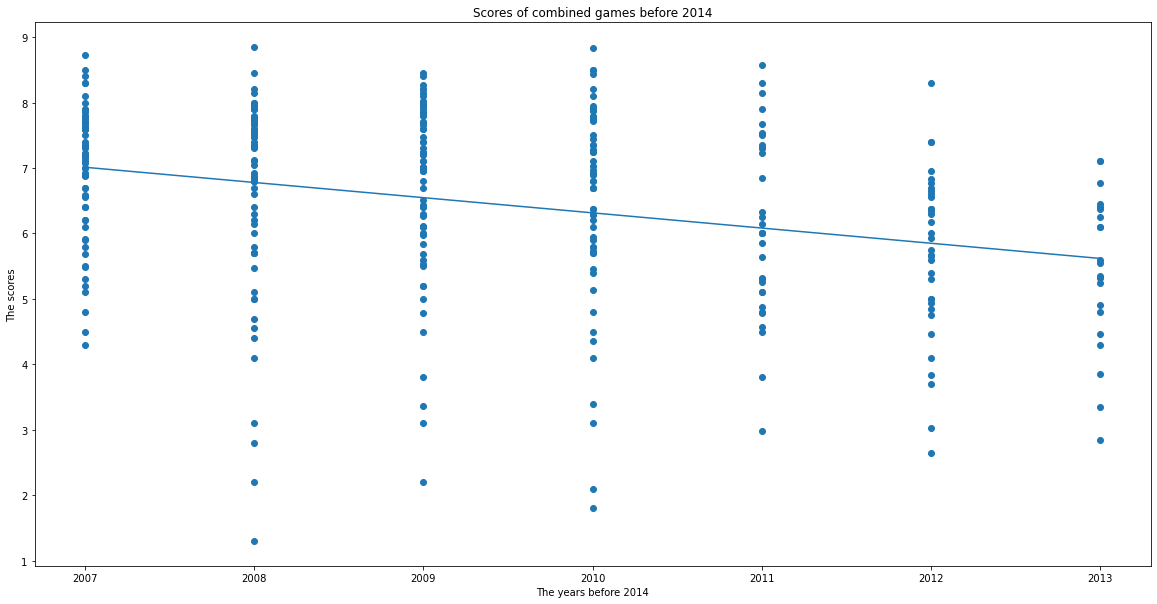

In [20]:
#Scores for games before the year 2014
fig , togeth_visual =plt.subplots(figsize=(20,10))
togeth_visual.set_title("Scores of combined games before 2014")
togeth_visual.set_yticks([i for i in range(0,11)])
#Labeling of the visual representation of titles and axes
togeth_visual.set_ylabel("The scores")
togeth_visual.set_xlabel("The years before 2014")
#Importing and organizing data
togeth_visual.scatter(x=list(combined_avg[combined_avg['Year'] < 2014]['Year']), y=list(combined_avg[combined_avg['Year'] < 2014]['Score']))
var1, vr2 = np.polyfit(list(combined_avg[combined_avg['Year'] < 2014]['Year']), list(combined_avg[combined_avg['Year'] < 2014]['Score']), 1)
#The rate over run which is slope is calculated for the combination of both games scores
plt.plot(list(combined_avg[combined_avg['Year'] < 2014]['Year']), var1*np.array(list(combined_avg[combined_avg['Year'] < 2014]['Year']))+vr2)
print(f"The slope of best fit line is: {var1}")

The plot above shows the data organization for an eight year time span and the regression line shows a small negative slope in scores. The scores for the games have been decreasing which leads us to the conclusion that the game quality has deteriorated as time progresses.

The slope of best fit line is: -0.13100963712904404


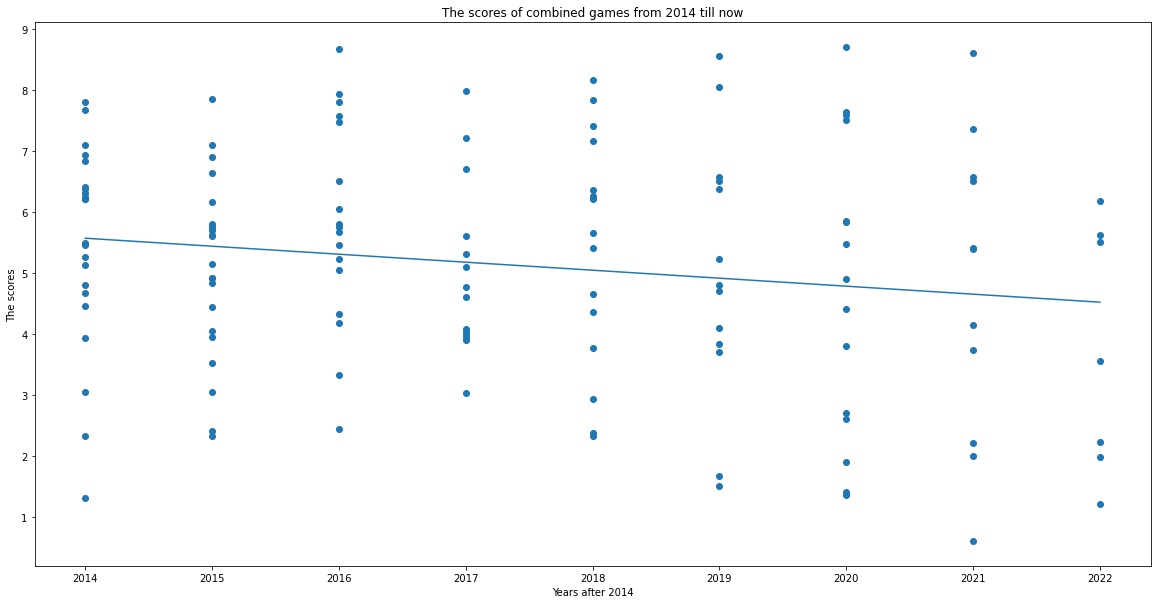

In [21]:
#Game Scores from 2014 till now in visual representation
fig, after_together = plt.subplots(figsize=(20,10))
after_together.set_yticks([i for i in range(0,11)])
#Labeling the visual representation
after_together.set_title("The scores of combined games from 2014 till now")
after_together.set_ylabel("The scores")
after_together.set_xlabel("Years after 2014")
#Gathering data to display fo the certain years we want
after_together.scatter(x=list(combined_avg[combined_avg['Year'] >= 2014]['Year']), y=list(combined_avg[combined_avg['Year'] >= 2014]['Score']))
num1 , num2=np.polyfit(list(combined_avg[combined_avg['Year'] >= 2014]['Year']), list(combined_avg[combined_avg['Year'] >= 2014]['Score']), 1)
plt.plot(list(combined_avg[combined_avg['Year'] >= 2014]['Year']), num1*np.array(list(combined_avg[combined_avg['Year'] >= 2014]['Year']))+num2)
print(f"The slope of best fit line is: {num1}")
#Displaying the slope to show relationship between time and scores

This plot portrays the games that came out in the last eight years. The plot regression line looks similar to the one before this, but the slope tends to plummet more towards the recent years. The dots on this graph are not condensed at all and are all over the place from each other.

Slope of regression line: -0.1728657754251536


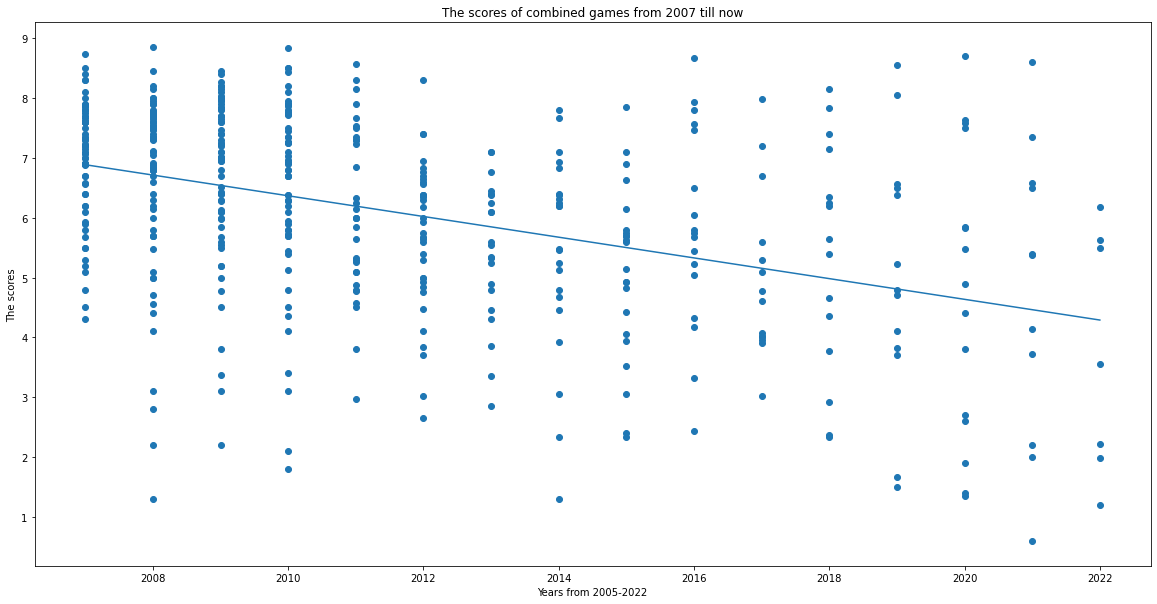

In [31]:
#Gathering both time periods of the graphs above into one of all the years
fig, scores_togeth = plt.subplots(figsize=(20,10))
scores_togeth.set_yticks([i for i in range(0,11)])
#Labeling graph of title and setting numbers on axes
scores_togeth.set_title("The scores of combined games from 2007 till now")
scores_togeth.set_ylabel("The scores")
scores_togeth.set_xlabel("Years from 2005-2022")
#Gathering both time periods data and adding them up for average
scores_togeth.scatter(x=list(combined_avg['Year']), y=list(combined_avg['Score']))
q1, e1 = np.polyfit(list(combined_avg['Year']), list(combined_avg['Score']), 1)
plt.plot(list(combined_avg['Year']), q1*np.array(list(combined_avg['Year']))+e1)
#Calculating slope to show relationship of combined scores of all time periods
print(f"Slope of regression line: {q1}")

Since we now combined both of the plots of the two different time periods, we can see the combined regression line which conveys a strong negative relationship between time and scores. This concludes us to see that the quality of games have decreased each year. The biggest drop seems to be in the last couple years as the slope looks negatively steeper.

Now we will analyze how the different gaming platforms competed with each other based on their scores. These platforms vary as these came from the last decade.

/tmp/ipykernel_198/2311433726.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  console_plot.set_xticklabels(['GC', 'PSP', 'PS2', 'XBOX', 'GBA', 'DS', 'Switch', 'X360', 'Wii', 'PS3', 'PC', 'Wii-U', 'PSVita', 'XB1', 'PS4', 'XSX', 'PS5', '3DS', 'Other'])


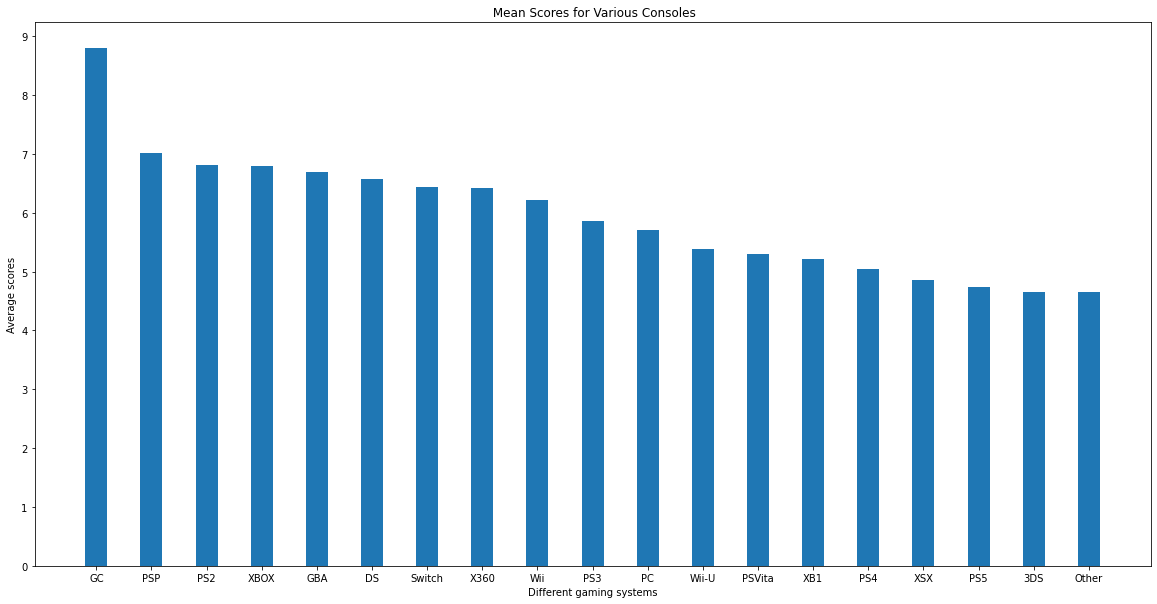

In [24]:
#Ratings for Various Gaming Systems
mean_score =[]
gaming_systems = list(combined['Platform'].drop_duplicates())
#Need a for loop to gather scores on each console
for platform in gaming_systems:
    average_sco=np.mean(list( combined[combined[ 'Platform'] == platform]['Score'] ))
    mean_score.append([platform, round(average_sco ,2)])
score_avg_console= pd.DataFrame(data=mean_score, columns=['platform', 'avg_score'] )
#Display the average for each
score_avg_console =score_avg_console.sort_values( by='avg_score', ascending=False)
score_avg_console
fig, console_plot=plt.subplots(figsize=(20,10))
#Labeling each part and axis of the graph representation
console_plot.set_title(" Mean Scores for Various Consoles")
console_plot.set_ylabel("Average scores" )
console_plot.set_xticklabels(['GC', 'PSP', 'PS2', 'XBOX', 'GBA', 'DS', 'Switch', 'X360', 'Wii', 'PS3', 'PC', 'Wii-U', 'PSVita', 'XB1', 'PS4', 'XSX', 'PS5', '3DS', 'Other'])
#List of all the different gaming set ups
console_plot.set_yticks([i for i in range(0,11)])
console_plot.bar( gaming_systems, list( score_avg_console['avg_score']), width=0.4)
console_plot.set_xlabel("Different gaming systems" )
#Command to display the graph
plt.show()

Looking at the plot above, we can scrutinize how the older consoles had more success than the latter ones. The newer playstation versions such as the PS5 and PS4 have less scores than the PS2 and PS3. Even the XBOX360 which is older than the XboxOne has a higher score than the newer version of itself. We can see how companies feel forced to release new consoles because the success of the old one, however, that backfires because the newer one ends up being worse than the older one in quality and likeableness.

<b>The Fourth Part on testing for Hypothesis<b>

Based on our analysis from the last part, we saw a downward negative relationship in score and time as the scores decreased every year. In this step of Hypothesis Testing, we check is this is statistically significant or not. When we perform this testing, it is to ensure these trends and patterns are based on actual evidence and not by luck. Our null hypothesis is what we will come up as our general claim. Based on the alternative hypothesis, we check to see if the null hypothesis should be rejected. Our beginning question was if VideoGame quality worsened in the last eight years so our null hypothesis is the flip side of this.

Null Hypothesis: VideoGame quality has not gotten worse in the last eight years

Alternative Hypothesis: Suppose the VideoGames did get worse in the last eight years

In this part, we begin with a confidence interval and that will be ninety five percent for us. Our significant value will be .05. We will also obtain a p-value where we can see to reject or fail to reject the hypothesis null.

Failing to reject null hypothesis means the null hypothesis is right and rejecting it means the alternate hypothesis might be right.

In [26]:
#Importations needed to get our conclusions and do the hypothesis testing
import statsmodels.formula.api as smf
import statsmodels.api as stats
#Checking our slope to see relationship between two variables
hypo_test= smf.ols( formula =  'Score ~ Year' ,data=combined_avg ).fit()
hypo_test.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     104.8
Date:                Sat, 17 Dec 2022   Prob (F-statistic):           2.43e-22
Time:                        02:49:50   Log-Likelihood:                -868.79
No. Observations:                 474   AIC:                             1742.
Df Residuals:                     472   BIC:                             1750.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    353.8249     33.974     10.414      0.000     287.065     420.585
Year          -0.1729      0.017    -10.235      0.000      -0.206      -0.140
==============================================================================
Omnibus:                       25.632   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.715
Skew:                          -0.547   Prob(JB):                     5.82e-07
Kurtosis:                       3.505   Cond. No.                     9.82e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Examining the table above, we see the rate over run is less than 0 meaning negative. The main thing is looking at our p value which is less than five percent. This means we fail to reject the null hypothesis as the quality of games did get worse in the last eight years. This was statistically proven.

<b>Fifth Part on Communication of Insights attained<b>

Looking at everything we have done so far, the main takeaway is how the VideoGames have worsened over time and the period from 2005-2013 had better results of games than in the last eight years. The big reason for the decrease in VideoGame quality is because customers want another sequel to the successful game that was made and it is hard for developers to top the success they had on the first version. A lot of the sequel games use the same graphics from the previous versions because it is hard to top that and that is what the customers like.

Innovation is hard for creators to get a hang of as they use the same intellectual properties (IP) as before. As we examined earlier, the consoles were better in the first time period before 2014 and the later versions that came out like PS4 and PS5 were worse than the PS3. So to answer the main inquiry we had of "Have VideoGames gotten worse in the last eight years," the answer is definitely yes because of the rejecting of null hypothesis with our p value being less than five percent.